In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyfixest as pf

np.random.seed(42)

In [2]:
from saturated import saturated_event_study, test_treatment_heterogeneity
from plotters import checkplot, diag_plot
from dgp import panel_dgp_stagg

In [3]:
num_periods = 30
treatment_start_cohorts = [10, 15, 20]
num_treated_units = [25_00, 50_00, 25_00]

# effect functions
treat_effect_vector_1 = np.log(
    2 * np.arange(1, num_periods - treatment_start_cohorts[1] + 1)
)
treat_effect_vector_1[8:] = 0  # switch off effects after a week
base_treatment_effects = [
    np.r_[
        np.linspace(2, 0, num_periods - treatment_start_cohorts[0] - 10),
        np.repeat(0, 10),
    ],
    treat_effect_vector_1,
    np.sin(
        np.arange(1, num_periods - treatment_start_cohorts[2] + 1)
    ),  # Treatment effect function for cohort 2
]

sigma_i, sigma_t = 2, 1
sigma_epsilon = 1
dgp = panel_dgp_stagg(
    num_units=20_000,
    num_treated=num_treated_units,
    num_periods=num_periods,
    treatment_start_cohorts=treatment_start_cohorts,
    hetfx=False,
    base_treatment_effects=base_treatment_effects,
    sigma_unit=sigma_i,
    sigma_time=sigma_t,
    sigma_epsilon=sigma_epsilon,
)
Y0, Y1, W, df = dgp["Y0"], dgp["Y1"], dgp["W"], dgp["dataframe"]

/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.inf]', 'C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-19.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-18.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-17.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-16.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.15.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.16.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.17.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.18.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.19.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.inf]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_20', 'C(re

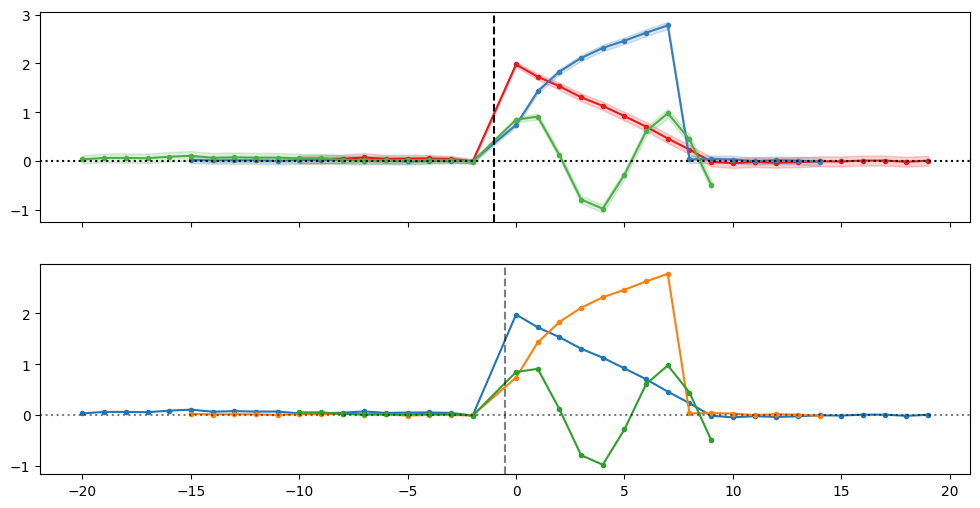

In [5]:
checkplot(df)

/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.inf]'].
            The variables are dropped from the model.
            
  warnings.warn(
/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-19.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-18.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-17.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-16.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-15.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-14.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-13.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-12.0]

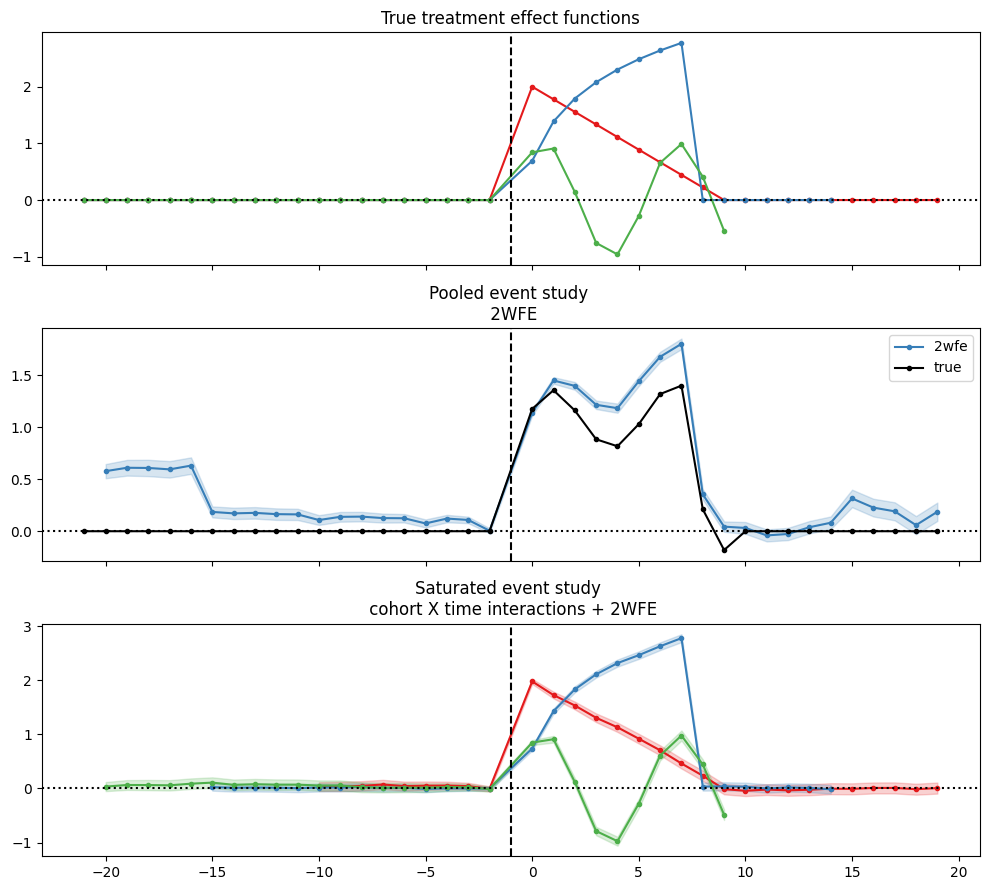

In [6]:
diag_plot(df, treatment_start_cohorts, base_treatment_effects)

In [ ]:
test_treatment_heterogeneity(df)

/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.inf]', 'C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-19.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-18.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-17.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-16.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.15.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.16.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.17.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.18.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.19.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.inf]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_20', 'C(re

0.0

## homogeneous DGP

In [7]:
num_periods = 30
treatment_start_cohorts = [10, 15, 20]
num_treated_units = [25_00, 50_00, 25_00]

base_treatment_effects = [
    np.log(np.arange(1, num_periods - t + 1)) for t in treatment_start_cohorts
]


sigma_i, sigma_t = 2, 1
sigma_epsilon = 1
dgp_homog = panel_dgp_stagg(
    num_units=20_000,
    num_treated=num_treated_units,
    num_periods=num_periods,
    treatment_start_cohorts=treatment_start_cohorts,
    hetfx=False,
    base_treatment_effects=base_treatment_effects,
    sigma_unit=sigma_i,
    sigma_time=sigma_t,
    sigma_epsilon=sigma_epsilon,
)
Y0_h, Y1_h, W_h, df_h = dgp_homog["Y0"], dgp_homog["Y1"], dgp_homog["W"], dgp_homog["dataframe"]

/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.inf]'].
            The variables are dropped from the model.
            
  warnings.warn(
/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-19.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-18.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-17.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-16.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-15.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-14.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-13.0]:cohort_dummy_10', 'C(rel_time, contr.treatment(base=-1.0))[T.-12.0]

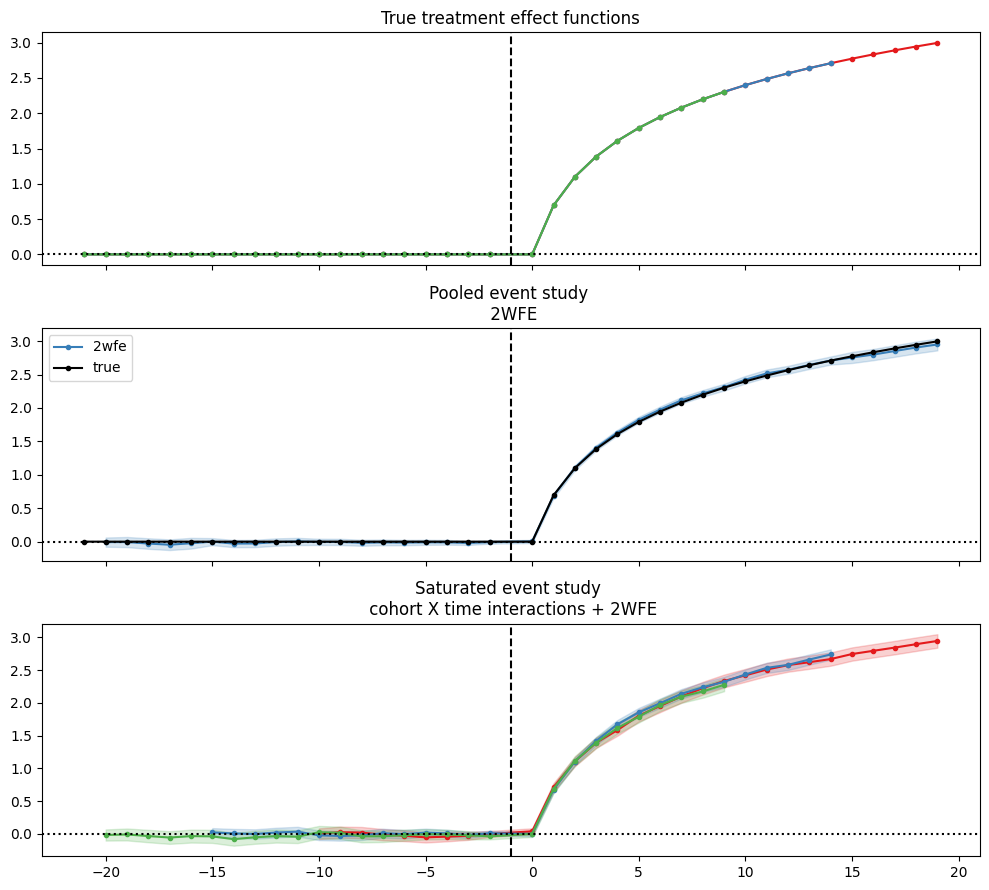

In [8]:
diag_plot(df_h, treatment_start_cohorts, base_treatment_effects)

In [9]:
test_treatment_heterogeneity(df_h)

/home/alal/Desktop/forks/pyfixest/pyfixest/estimation/feols_.py:2540: UserWarning: 
            The following variables are collinear: ['C(rel_time, contr.treatment(base=-1.0))[T.inf]', 'C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-19.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-18.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-17.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-16.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.15.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.16.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.17.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.18.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.19.0]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.inf]:cohort_dummy_15', 'C(rel_time, contr.treatment(base=-1.0))[T.-20.0]:cohort_dummy_20', 'C(re

0.6974292742130208